In [9]:
import pandas as pd
import numpy as np
import requests
import lxml
from bs4 import BeautifulSoup as bS
from matplotlib import pyplot as plt
%matplotlib inline

# Chapter 2: Adding Variables 

The goal of this chapter is to add some columns to the data that i think add to the important dependent variables i need to take account of before fitting my model. The earliest thoughts I have are to add a measure of bank holidays, sunshine available (to give the system an idea of how much solar energy will be provided, temperature etcetera. )

## Bank Holidays 
This section works on pulling the dates of bank holidays from a boring website and eventually we will add them to the main data, taking into account that bank holidays dont just affect the days themselves but also the rest of the week. 


In [15]:
year=input('which year')
data='https://www.officeholidays.com/countries/united-kingdom/england/{}'.format(year)
data='https://www.timeanddate.com/date/weekday.html'
page = requests.get(data)
print(page.status_code)
soup = bS(page.content, 'html.parser')
print(soup)
tab=soup.find('table', class_ = 'country-table')
items=tab.find_all(attrs={"class": ["country","region"]})
dates=[]
for it in items:
    dates.append(str(it.find('time'))[16:26])
#alternatively 
dates2=[]
for it in items:
    i=it.find('time').contents[0][4:]+'-'+it.find('time').contents[0][0:3].upper()+'-'+year
    dates2.append(i)
print(dates)
print(dates2)
#dates=items.find_all('time')
#print(dates)

which year2020
200
<!DOCTYPE html>
<!--
scripts and programs that download content transparent to the user are not allowed without permission
--><html lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title>Weekday Calculator – What Day is this Date?</title><meta content="Finds the day of the week for any date. Which day of the week you were born, which day your next birthday will be on, or if the Moon landing was on a Saturday or a Sunday. " name="description"/><meta content="https://c.tadst.com/gfx/og/tadlogo-facebook.png" property="og:image"/><meta content="website" property="og:type"/><style>
@font-face{font-family:iconfont;src:url("/common/fonts/iconfont.woff2?v8") format("woff2"),url("/common/fonts/iconfont.woff?v8") format("woff"),url("/common/fonts/iconfont.ttf?v8") format("truetype"),url("/common/fonts/iconfont.svg?v8#iconfont") format("svg");font-weight:400;font-style:normal}
</style>
<link as="font" crossorigin="" href="/common/fonts/iconfo

AttributeError: 'NoneType' object has no attribute 'find_all'

In [11]:
url='https://publicholidays.co.uk/england/2019-dates/'
headers={ 'User_Agent' : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"}

text=requests.get(url, headers=headers)
text.status_code

403

# Chapter 3: Preparing data  


## How to deal with time data    

Something that was troubling me was the fact that although December and January have a really close proximity to one another, they are not related by numbering them from 1-12, in that while january and february a month apart, that same relationship between january and december would not be appreciated in this system. 

Probably more importantly is the relationship between 24:00 at night and one oclock in the morning. These times are right next to one another but the algorithm would not be able to determine that, if they were kept as a 0-48 scale. 

The solution to this is to use a sinusiodal curve, with a $\omega$ of $\frac{2 \pi}{T}$ where T, the time period, is 48 for the daily scale and 365 for the yearly scale. I think it is necessary to match how the energy pattern changes over time for what kinf or curve we use. To explain this I am replotting something from earlier on in the project. 

NameError: name 'file3' is not defined

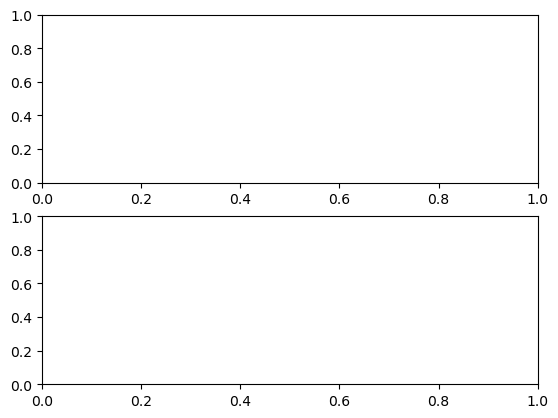

<Figure size 2000x1200 with 0 Axes>

In [12]:
fig, (ax1, ax2)=plt.subplots(2,1)
plt.figure(figsize=(20,12))
toplot= file3['ND']+ file3['EMBEDDED_WIND_GENERATION']+ file3['EMBEDDED_SOLAR_GENERATION']
ax1.scatter(file3.index/48, file3['ND'])
ax2.scatter(file3.index/48, toplot)

This is the energy usage at 12 oclock throughout the year and it seems to follow a cos curve quite well with some weird variations that I am attributing to christmas. Now if I applied a cos curve to the time of year column it would follow a similar crve to this. Does that make it easier for the algorithm to group data and provide insight? I think it probably does, and in fact is probably quite important. 

In [ ]:
hours=file2['SETTLEMENT_PERIOD'].unique()
av=[]
for i in hours:
    av.append(file2.loc[file2['SETTLEMENT_PERIOD']==i, :]['ND'].mean())
fig, ax=plt.subplots()
ax.scatter(hours[0:-2], av[0:-2])
#Note I have lopped off two values which are due to the clocks changing

This is taken by averaging the power usage for each half an hour time period across the year. It makes an absolutely horrid graph haha but I think it would look better if this was slightly split up between the summer months. What is quite clear is that there is a connection between the values at the end of the day and the start of the next. it is also clear that a cos graph would not fit this data well at all. I will have to think carefully about what i choose, be it a cos graph a -sin plot or one of these with some offset,  $\delta$. 

Something to consider is that if I do use this method, the times will be bunched in a slightly odd way. This is because a uniform input varying between 0 and 2$\pi$ poduced a curve which is bunched around turns in the curve, around 0 and $\pi$ for a cosine curve adn around $-\frac{\pi}{2}$ and $\frac{\pi}{2}$ for a sin curve, while they are more spread out in period of the curve with a greater $\frac{d}{dx}$. Will have to think about how this will affect my project. 

In [ ]:
def min(a):
    mi=1
    for i in mi:
        if 
        mi+=1


## Bank Holidays 
This section works on pulling the dates of bank holidays from a boring website and eventually we will add them to the main data, taking into account that bank holidays dont just affect the days themselves but also the rest of the week. 
